omer vazana

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from torchvision.models import resnet18
import torchvision.models as models

1. Setup and Data Preparatio

In [17]:

# Define transformations for training and testing datasets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation up to 10 degrees
    transforms.ToTensor(),  # Convert to tensor
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load datasets
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=train_transforms, download=True)
test_dataset = datasets.FashionMNIST(root="./data", train=False, transform=test_transforms, download=True)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:

# Define the device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Step 1: Freeze all convolutional layers for initial training
for param in model.parameters():
    param.requires_grad = False

# Step 2: Modify the fully connected (fc) layer to match the number of classes in Fashion-MNIST
n_classes = 10  # Fashion-MNIST has 10 classes
num_ftrs = model.fc.in_features  # Get the input features of the last FC layer
model.fc = nn.Linear(num_ftrs, n_classes)  # Replace FC layer with a new one

# Move the model to the selected device
model = model.to(device)

# Define the loss function (Cross-Entropy Loss for classification tasks)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer for fine-tuning the FC layer)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Print the modified model structure (optional, for verification)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

c:\Users\TAL\Desktop\למידה עמוקה\עבודת הגשה למידה עמוקה 4\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\TAL\Desktop\למידה עמוקה\עבודת הגשה למידה עמוקה 4\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


2. Model Building

In [19]:

# Device selection
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained ResNet18 model
model = resnet18(pretrained=True)

# Step 1: Freeze all convolutional layers for initial training
for param in model.parameters():
    param.requires_grad = False

# Step 2: Modify the fully connected (fc) layer to match the number of classes
n_classes = 10  # Replace with the number of classes in your dataset
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, n_classes)

# Move the model to the selected device
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for training the new fully connected layer
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Optional: Print the model structure to verify the modifications
print(model)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

3. Training

In [20]:

# Step 1: Define hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 10
unfreeze_epoch = 5  # Fine-tuning starts after this epoch

# Step 2: Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)

# Scheduler for learning rate decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Step 3: Prepare to store metrics for visualization later
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1s = []

best_accuracy = 0.0  # To track the best performing model

# Function to enable fine-tuning
def enable_fine_tuning():
    for param in model.parameters():
        param.requires_grad = True

# Step 4: Training and validation loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    # Enable fine-tuning at the specified epoch
    if epoch == unfreeze_epoch:
        print("Enabling fine-tuning...")
        enable_fine_tuning()  # Unfreeze earlier layers
        optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower the learning rate for fine-tuning

    # Training loop
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store results for metrics calculation
        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Step 5: Calculate and store training metrics
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = accuracy_score(all_labels, all_preds)
    epoch_train_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    epoch_train_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    epoch_train_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)
    train_precisions.append(epoch_train_precision)
    train_recalls.append(epoch_train_recall)
    train_f1s.append(epoch_train_f1)

    print(f"Epoch [{epoch + 1}/{num_epochs}] | Train Loss: {epoch_train_loss:.4f} | Train Accuracy: {epoch_train_accuracy:.4f} | Precision: {epoch_train_precision:.4f} | Recall: {epoch_train_recall:.4f} | F1-Score: {epoch_train_f1:.4f}")

    # Step 6: Validation Phase
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate and store validation metrics
    epoch_val_loss = val_running_loss / len(test_loader)
    epoch_val_accuracy = accuracy_score(val_labels, val_preds)
    epoch_val_precision = precision_score(val_labels, val_preds, average='weighted', zero_division=1)
    epoch_val_recall = recall_score(val_labels, val_preds, average='weighted', zero_division=1)
    epoch_val_f1 = f1_score(val_labels, val_preds, average='weighted', zero_division=1)

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)
    val_precisions.append(epoch_val_precision)
    val_recalls.append(epoch_val_recall)
    val_f1s.append(epoch_val_f1)

    print(f"Validation Loss: {epoch_val_loss:.4f} | Validation Accuracy: {epoch_val_accuracy:.4f} | Precision: {epoch_val_precision:.4f} | Recall: {epoch_val_recall:.4f} | F1-Score: {epoch_val_f1:.4f}")

    # Step 7: Save the best model based on validation accuracy
    if epoch_val_accuracy > best_accuracy:
        best_accuracy = epoch_val_accuracy
        torch.save(model.state_dict(), "best_resnet_fashion_mnist.pth")
        print("Best model saved!")

    # Step 8: Update the learning rate using the scheduler
    scheduler.step()


Epoch [1/10] | Train Loss: 0.6651 | Train Accuracy: 0.7744 | Precision: 0.7720 | Recall: 0.7744 | F1-Score: 0.7727
Validation Loss: 0.5398 | Validation Accuracy: 0.8058 | Precision: 0.8163 | Recall: 0.8058 | F1-Score: 0.8016
Best model saved!
Epoch [2/10] | Train Loss: 0.5186 | Train Accuracy: 0.8146 | Precision: 0.8132 | Recall: 0.8146 | F1-Score: 0.8136
Validation Loss: 0.5110 | Validation Accuracy: 0.8151 | Precision: 0.8258 | Recall: 0.8151 | F1-Score: 0.8136
Best model saved!
Epoch [3/10] | Train Loss: 0.5026 | Train Accuracy: 0.8190 | Precision: 0.8177 | Recall: 0.8190 | F1-Score: 0.8181
Validation Loss: 0.4718 | Validation Accuracy: 0.8330 | Precision: 0.8340 | Recall: 0.8330 | F1-Score: 0.8319
Best model saved!
Epoch [4/10] | Train Loss: 0.4668 | Train Accuracy: 0.8340 | Precision: 0.8327 | Recall: 0.8340 | F1-Score: 0.8331
Validation Loss: 0.4745 | Validation Accuracy: 0.8270 | Precision: 0.8304 | Recall: 0.8270 | F1-Score: 0.8247
Epoch [5/10] | Train Loss: 0.4628 | Train Accu

4. Evaluation

In [22]:

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
all_preds = []  # List to store predictions
all_labels = []  # List to store true labels

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in test_loader:  # Iterate through the test set
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the correct device
        outputs = model(inputs)  # Forward pass
        _, preds = torch.max(outputs, 1)  # Get predicted classes
        all_preds.extend(preds.cpu().numpy())  # Store predictions
        all_labels.extend(labels.cpu().numpy())  # Store true labels

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

# Compute and display confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:\n", cm)

# Generate and print classification report
target_names = [str(i) for i in range(10)]  # Assuming 10 classes (0-9) for FashionMNIST
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=target_names))


Test Accuracy: 0.9440
Test Precision: 0.9441
Test Recall: 0.9440
Test F1-Score: 0.9438

Confusion Matrix:
 [[904   1  20  17   2   1  54   0   1   0]
 [  0 987   1  10   0   0   1   0   1   0]
 [ 11   1 904  11  48   0  25   0   0   0]
 [  7   1   4 957  18   0  13   0   0   0]
 [  2   0   7   9 956   0  26   0   0   0]
 [  0   0   0   0   0 973   0   8   1  18]
 [ 77   0  33  28  46   0 814   0   2   0]
 [  0   0   0   0   0   3   0 973   0  24]
 [  2   0   0   3   0   1   3   0 991   0]
 [  0   0   0   0   0   1   1  17   0 981]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1000
           1       1.00      0.99      0.99      1000
           2       0.93      0.90      0.92      1000
           3       0.92      0.96      0.94      1000
           4       0.89      0.96      0.92      1000
           5       0.99      0.97      0.98      1000
           6       0.87      0.81      0.84      1000
    

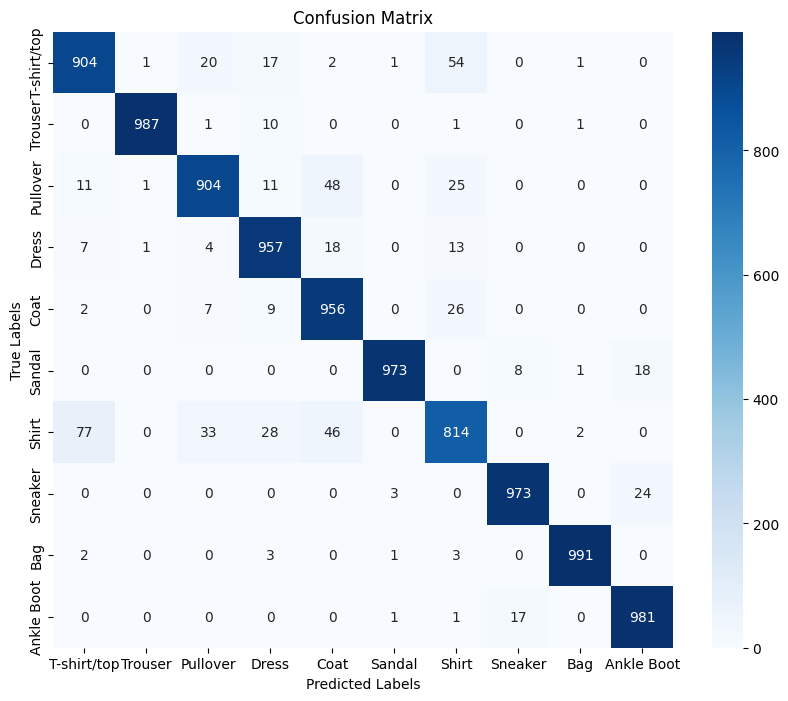

In [24]:
# Define class labels for Fashion-MNIST
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]

# Assuming `all_labels` and `all_preds` contain the true and predicted labels
# These should be collected during the evaluation phase (validation or test set)

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



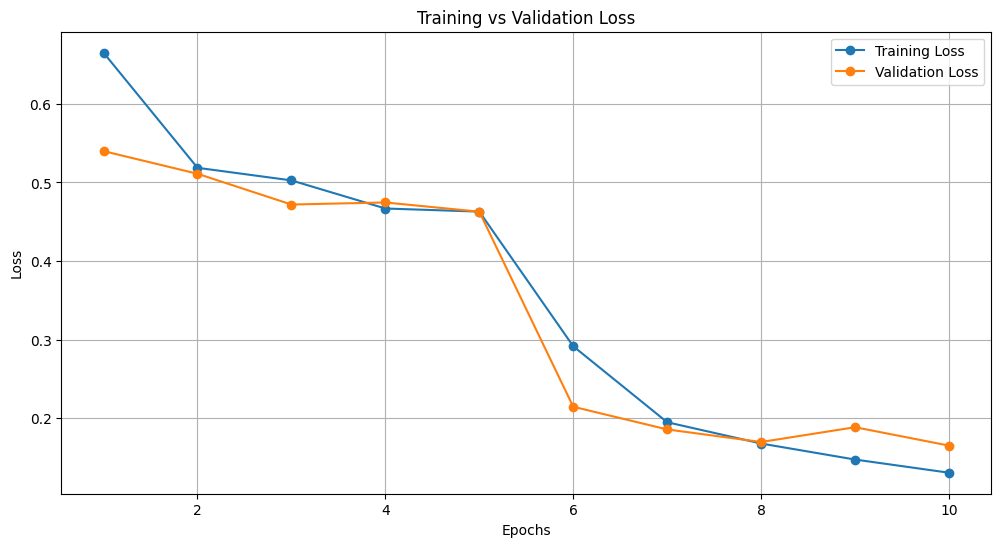

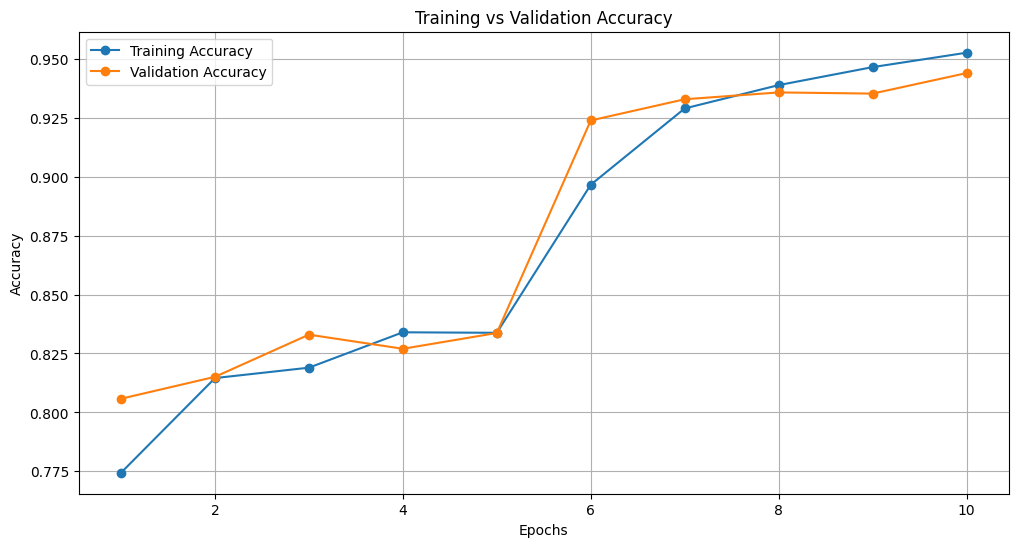

In [25]:

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

